In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

<h2>Import data set<h2>

In [5]:
data=pd.read_csv("complete_data.csv")
pd.set_option('display.max_colwidth', -1)
data
# 0 - Fibrilacion Atrial
# 1 - Congestión cardíaca
# 2 - Infarto al miocardio

<ipython-input-5-10113864c557>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,case,record,condition,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,p080120,3406983_0002,0,1.168396,0.004582,-0.066187,3.221785,0.964767,0.009790,-0.453246,...,-0.103913,2.793033,0.172803,0.000307,0.447250,4.423904,0.520330,0.000906,-0.023182,3.148179
1,p080120,3406983_0003,0,1.047608,0.042369,0.347934,2.880558,0.802464,0.049698,0.906444,...,-0.488137,2.890621,0.154892,0.000404,0.594089,4.624611,0.468682,0.001764,1.106800,3.531728
2,p080120,3406983_0007,0,1.135748,0.032810,0.793212,2.950192,0.831941,0.067280,1.560872,...,-0.628212,2.542760,0.148726,0.000284,0.644780,3.901983,0.431369,0.001633,1.292445,2.946423
3,p080120,3406983_0009,0,1.089244,0.049727,0.265037,2.391366,0.849848,0.069910,0.986995,...,-0.419975,2.841227,0.178373,0.003703,4.780401,5.235074,0.485346,0.006567,3.701162,4.636655
4,p080120,3406983_0011,0,0.839026,0.103725,-0.062788,2.880340,0.625933,0.097401,0.591214,...,3.065195,3.596683,0.166810,0.002794,1.484218,6.241964,0.441605,0.007855,-2.092817,5.039722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15009,p098347,3954001_0186,1,0.722753,0.051921,-1.200063,2.725754,0.602475,0.066834,-0.906201,...,1.428733,4.859112,0.499129,0.026670,0.244558,3.929429,0.840160,0.046363,-0.218423,2.686715
15010,p098347,3954001_0192,1,0.216115,0.111428,1.865570,2.531359,0.158197,0.086679,2.152578,...,0.623120,1.942071,0.138728,0.024246,1.302131,2.320945,0.212150,0.050358,1.377666,2.175748
15011,p098347,3954001_0195,1,0.204273,0.023557,0.261068,1.243955,0.137125,0.015403,0.640089,...,0.926789,1.736555,0.143462,0.009433,0.117747,1.668129,0.259129,0.029111,0.491076,1.620295
15012,p098347,3954001_0198,1,0.616718,0.059409,-0.262118,1.693635,0.496942,0.054278,0.037806,...,-0.431677,2.995430,0.307032,0.004918,-1.161433,2.395304,0.586572,0.025943,-1.010865,1.664257


<h2>Extract Non linear analysis<h2>

In [55]:
#Clean dataset
pathology = data[["condition","ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

pathology = pathology.dropna()
pathology

,condition,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,se_spectral_entropy,hfd_mean,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,0,1.168396,0.004582,-0.066187,3.221785,0.964767,0.009790,-0.453246,2.700965,2.070072,...,-0.103913,2.793033,0.172803,0.000307,0.447250,4.423904,0.520330,0.000906,-0.023182,3.148179
1,0,1.047608,0.042369,0.347934,2.880558,0.802464,0.049698,0.906444,3.232049,2.090014,...,-0.488137,2.890621,0.154892,0.000404,0.594089,4.624611,0.468682,0.001764,1.106800,3.531728
2,0,1.135748,0.032810,0.793212,2.950192,0.831941,0.067280,1.560872,2.941741,2.085422,...,-0.628212,2.542760,0.148726,0.000284,0.644780,3.901983,0.431369,0.001633,1.292445,2.946423
3,0,1.089244,0.049727,0.265037,2.391366,0.849848,0.069910,0.986995,2.545088,2.091715,...,-0.419975,2.841227,0.178373,0.003703,4.780401,5.235074,0.485346,0.006567,3.701162,4.636655
4,0,0.839026,0.103725,-0.062788,2.880340,0.625933,0.097401,0.591214,3.075024,2.113146,...,3.065195,3.596683,0.166810,0.002794,1.484218,6.241964,0.441605,0.007855,-2.092817,5.039722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15009,1,0.722753,0.051921,-1.200063,2.725754,0.602475,0.066834,-0.906201,2.417971,2.075841,...,1.428733,4.859112,0.499129,0.026670,0.244558,3.929429,0.840160,0.046363,-0.218423,2.686715
15010,1,0.216115,0.111428,1.865570,2.531359,0.158197,0.086679,2.152578,2.796528,2.336031,...,0.623120,1.942071,0.138728,0.024246,1.302131,2.320945,0.212150,0.050358,1.377666,2.175748
15011,1,0.204273,0.023557,0.261068,1.243955,0.137125,0.015403,0.640089,1.360668,2.185572,...,0.926789,1.736555,0.143462,0.009433,0.117747,1.668129,0.259129,0.029111,0.491076,1.620295
15012,1,0.616718,0.059409,-0.262118,1.693635,0.496942,0.054278,0.037806,1.756125,2.098001,...,-0.431677,2.995430,0.307032,0.004918,-1.161433,2.395304,0.586572,0.025943,-1.010865,1.664257


<h2>Define train set and targets<h2>

In [70]:
#Group by pathology
a_f=pathology[pathology["condition"] ==0]
c_c=pathology[pathology["condition"] ==1]
m_i=pathology[pathology["condition"] ==2]

#Extract important metrics
atrial_f = a_f[["ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
congestive_h = c_c[["ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
myocardial_i = m_i[["ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]

#Create target array for training
targets=a_f['condition'].tolist()+m_i['condition'].tolist()+c_c['condition'].tolist()

#Create input array for training
X=pd.concat([atrial_f,myocardial_i,congestive_h],ignore_index=True)
X

,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,se_spectral_entropy,hfd_mean,hfd_variance,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,1.168396,0.004582,-0.066187,3.221785,0.964767,0.009790,-0.453246,2.700965,2.070072,0.000166,-0.103913,2.793033,0.172803,0.000307,0.447250,4.423904,0.520330,0.000906,-0.023182,3.148179
1,1.047608,0.042369,0.347934,2.880558,0.802464,0.049698,0.906444,3.232049,2.090014,0.000189,-0.488137,2.890621,0.154892,0.000404,0.594089,4.624611,0.468682,0.001764,1.106800,3.531728
2,1.135748,0.032810,0.793212,2.950192,0.831941,0.067280,1.560872,2.941741,2.085422,0.000052,-0.628212,2.542760,0.148726,0.000284,0.644780,3.901983,0.431369,0.001633,1.292445,2.946423
3,1.089244,0.049727,0.265037,2.391366,0.849848,0.069910,0.986995,2.545088,2.091715,0.000124,-0.419975,2.841227,0.178373,0.003703,4.780401,5.235074,0.485346,0.006567,3.701162,4.636655
4,0.839026,0.103725,-0.062788,2.880340,0.625933,0.097401,0.591214,3.075024,2.113146,0.003489,3.065195,3.596683,0.166810,0.002794,1.484218,6.241964,0.441605,0.007855,-2.092817,5.039722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14860,0.722753,0.051921,-1.200063,2.725754,0.602475,0.066834,-0.906201,2.417971,2.075841,0.001065,1.428733,4.859112,0.499129,0.026670,0.244558,3.929429,0.840160,0.046363,-0.218423,2.686715
14861,0.216115,0.111428,1.865570,2.531359,0.158197,0.086679,2.152578,2.796528,2.336031,0.061766,0.623120,1.942071,0.138728,0.024246,1.302131,2.320945,0.212150,0.050358,1.377666,2.175748
14862,0.204273,0.023557,0.261068,1.243955,0.137125,0.015403,0.640089,1.360668,2.185572,0.023761,0.926789,1.736555,0.143462,0.009433,0.117747,1.668129,0.259129,0.029111,0.491076,1.620295
14863,0.616718,0.059409,-0.262118,1.693635,0.496942,0.054278,0.037806,1.756125,2.098001,0.000228,-0.431677,2.995430,0.307032,0.004918,-1.161433,2.395304,0.586572,0.025943,-1.010865,1.664257


<h2>Histograms<h2>

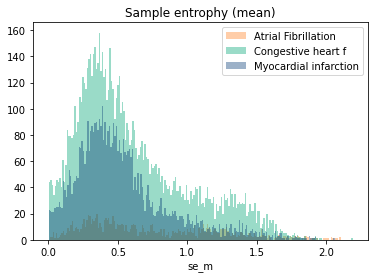

In [79]:
se_af=a_f["se_m"]
se_cc=c_c["se_m"]
se_mi=m_i["se_m"]


sn.distplot(a=se_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=se_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=se_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (mean)")
plt.legend()


(0.0, 0.4)

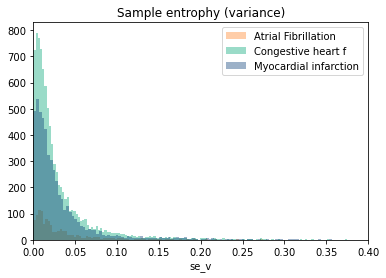

In [94]:
sev_af=a_f["se_v"]
sev_cc=c_c["se_v"]
sev_mi=m_i["se_v"]


sn.distplot(a=sev_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=sev_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=sev_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (variance)")
plt.legend()
plt.xlim(0, 0.4)

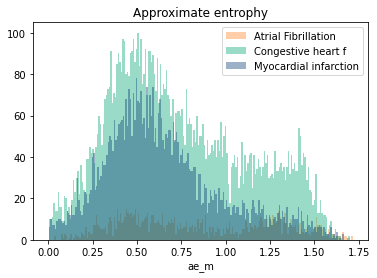

In [74]:
aem_af=a_f["ae_m"]
aem_cc=c_c["ae_m"]
aem_mi=m_i["ae_m"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aem_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aem_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aem_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (mean)")
plt.legend()


(0.0, 0.2)

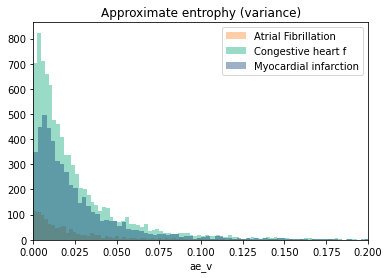

In [93]:
aev_af=a_f["ae_v"]
aev_cc=c_c["ae_v"]
aev_mi=m_i["ae_v"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aev_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aev_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aev_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (variance)")
plt.legend()
plt.xlim(0, 0.2)

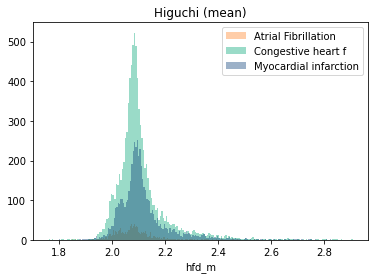

In [85]:
hfd_af=a_f["hfd_m"]
hfd_cc=c_c["hfd_m"]
hfd_mi=m_i["hfd_m"]


sn.distplot(a=hfd_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfd_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfd_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (mean)")
plt.legend()

(0.0, 0.015)

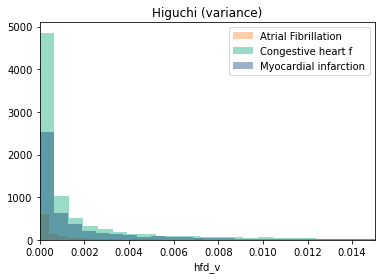

In [95]:
hfdv_af=a_f["hfd_v"]
hfdv_cc=c_c["hfd_v"]
hfdv_mi=m_i["hfd_v"]


sn.distplot(a=hfdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (variance)")
plt.legend()
plt.xlim(0, 0.015)

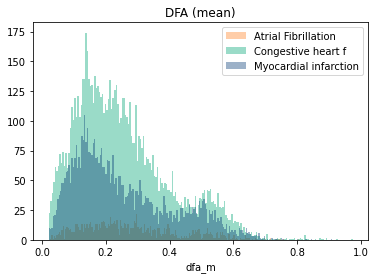

In [84]:
dfa_af=a_f["dfa_m"]
dfa_cc=c_c["dfa_m"]
dfa_mi=m_i["dfa_m"]


sn.distplot(a=dfa_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfa_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfa_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (mean)")
plt.legend()

(0.0, 0.04)

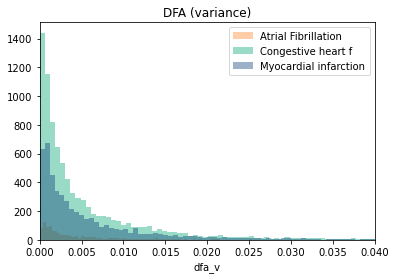

In [96]:
dfav_af=a_f["dfa_v"]
dfav_cc=c_c["dfa_v"]
dfav_mi=m_i["dfa_v"]


sn.distplot(a=dfav_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfav_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfav_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (variance)")
plt.legend()
plt.xlim(0, 0.04)

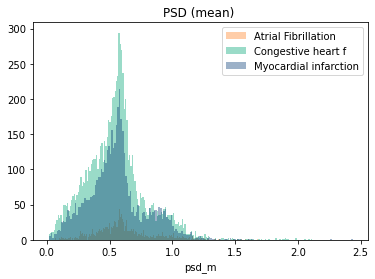

In [87]:
psd_af=a_f["psd_m"]
psd_cc=c_c["psd_m"]
psd_mi=m_i["psd_m"]


sn.distplot(a=psd_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psd_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psd_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (mean) ")
plt.legend()

(0.0, 0.2)

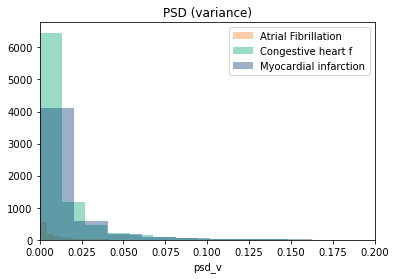

In [90]:
psdv_af=a_f["psd_v"]
psdv_cc=c_c["psd_v"]
psdv_mi=m_i["psd_v"]


sn.distplot(a=psdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (variance)")
plt.legend()
plt.xlim(0, 0.2)

<h2>Scatter plots<h2>

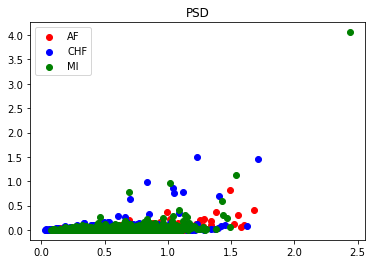

In [502]:
a=plt.scatter(atrial_f["psd_m"],atrial_f["psd_v"],color='red')
b=plt.scatter(congestive_h["psd_m"],congestive_h["psd_v"],color='blue')
c=plt.scatter(myocardial_i["psd_m"],myocardial_i["psd_v"],color='green')

plt.title("PSD")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

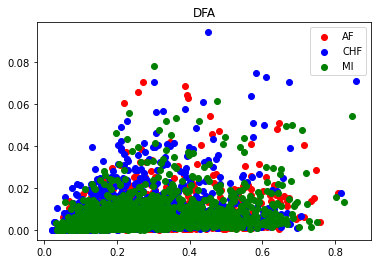

In [503]:
a=plt.scatter(atrial_f["dfa_m"],atrial_f["dfa_v"],color='red')
b=plt.scatter(congestive_h["dfa_m"],congestive_h["dfa_v"],color='blue')
c=plt.scatter(myocardial_i["dfa_m"],myocardial_i["dfa_v"],color='green')

plt.title("DFA")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

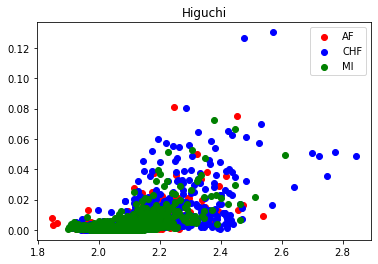

In [504]:
a=plt.scatter(atrial_f["hfd_m"],atrial_f["hfd_v"],color='red')
b=plt.scatter(congestive_h["hfd_m"],congestive_h["hfd_v"],color='blue')
c=plt.scatter(myocardial_i["hfd_m"],myocardial_i["hfd_v"],color='green')

plt.title("Higuchi")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

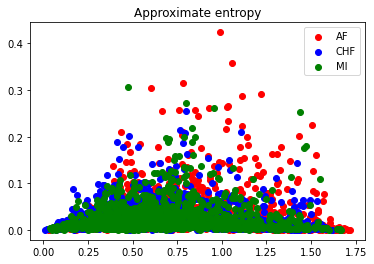

In [505]:
a=plt.scatter(atrial_f["ae_m"],atrial_f["ae_v"],color='red')
b=plt.scatter(congestive_h["ae_m"],congestive_h["ae_v"],color='blue')
c=plt.scatter(myocardial_i["ae_m"],myocardial_i["ae_v"],color='green')

plt.title("Approximate entropy")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

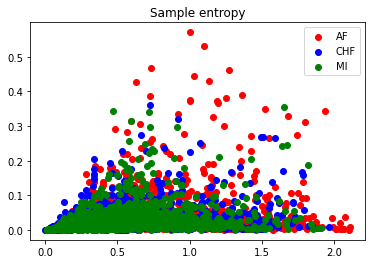

In [506]:
a=plt.scatter(atrial_f["se_m"],atrial_f["se_v"],color='red')
b=plt.scatter(congestive_h["se_m"],congestive_h["se_v"],color='blue')
c=plt.scatter(myocardial_i["se_m"],myocardial_i["se_v"],color='green')

plt.title("Sample entropy")
plt.axis
plt.legend((a,b,c),("AF","CHF","MI"))

<h2>Train datasets<h2>

In [71]:
#Split data to test and train groups
X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))

11892
11892


<h2>Logistic regression <h2>

Accuracy:  0.5748402287251934


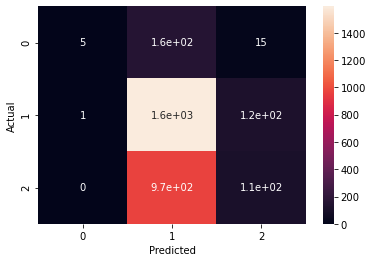

In [72]:
from sklearn.preprocessing import StandardScaler

#Logistic Regression function
logistic_regression= LogisticRegression(max_iter=20000)
sc = StandardScaler()

#Training
X_train = sc.fit_transform(X_train)
logistic_regression.fit(X_train,y_train)
X_test = sc.fit_transform(X_test)

#Testing
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

#Confussion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

<h2>K nearest neightbors<h2>

In [62]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

#Scale train set
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

knn.kneighbors_graph()

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.42


<2598x2598 sparse matrix of type '<class 'numpy.float64'>'
	with 7794 stored elements in Compressed Sparse Row format>

<h2>Gaussian Naive Bayes<h2>

In [63]:
from sklearn.naive_bayes import GaussianNB

#Gaussian Function
gnb = GaussianNB()

#Training
y_pred = gnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 650 points : 394
Accuracy :  0.39384615384615385


<h2>Bernoulli Naive Bayes<h2>

In [64]:
from sklearn.naive_bayes import BernoulliNB

#Bernoulli function
bnb = BernoulliNB()

#Training
y_pred = bnb.fit(X_train, y_train).predict(X_test)

#Testing
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 650 points : 401
Accuracy :  0.3830769230769231


<h2>Multi-layer Perceptron<h2>

0.5694584594685503


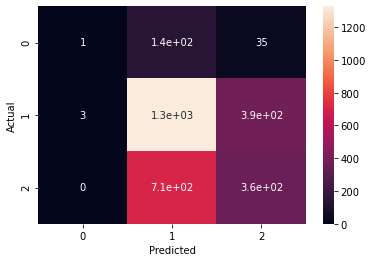

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

#Scale training data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#Neural Network
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1,max_iter=20000)

#Training
clf.fit(X_train, y_train)
X_test = sc.fit_transform(X_test)

#Score
y_pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

#Confussion matrix
confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Random forest<h2>


Accuracy :  0.6004036326942482


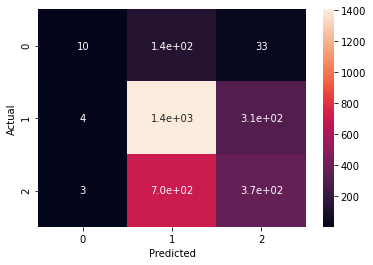

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


classifier = RandomForestClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Extra trees classifier<h2>

Accuracy :  0.6010763538513286


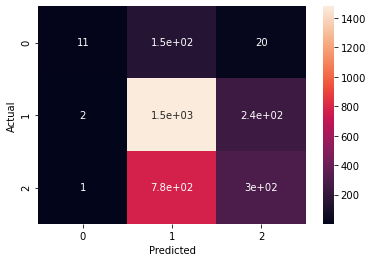

In [75]:
from sklearn.ensemble import ExtraTreesClassifier

classifier = ExtraTreesClassifier()
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

#X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Ada Boost<h2>

Accuracy :  0.5046153846153846


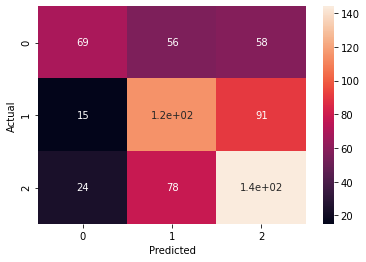

In [68]:
from sklearn.ensemble import AdaBoostClassifier

cassifier = AdaBoostClassifier(n_estimators=100)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)


<h2>Voting Classifier<h2>

In [69]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5) 
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.45 (+/- 0.01) [Ensemble]
